In [1]:
# Import the required Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
# Loading the Dataset

df = pd.read_csv("train.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
# Removing Unwanted column

df.drop(["employee_id"],axis=1,inplace=True)

## Basic EDA

In [ ]:
# Checking the Unique values in Target variable

df.is_promoted.unique()

array([0, 1], dtype=int64)

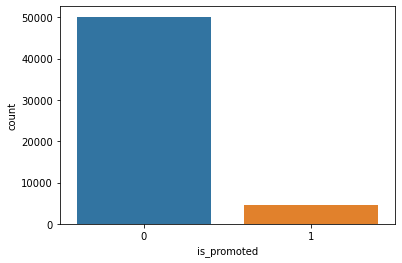

In [ ]:
# plotting the Target variable

sns.countplot(x="is_promoted",data=df)
plt.show()

In [ ]:
# Checking the value counts in Target Variable

df.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [ ]:
# Shape of the dataset

df.shape

(54808, 14)

In [ ]:
# Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [ ]:
# Identify the Missing Values

df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
# Describe the Numerical data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Describe the Categorical data

df.describe(include='O').T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


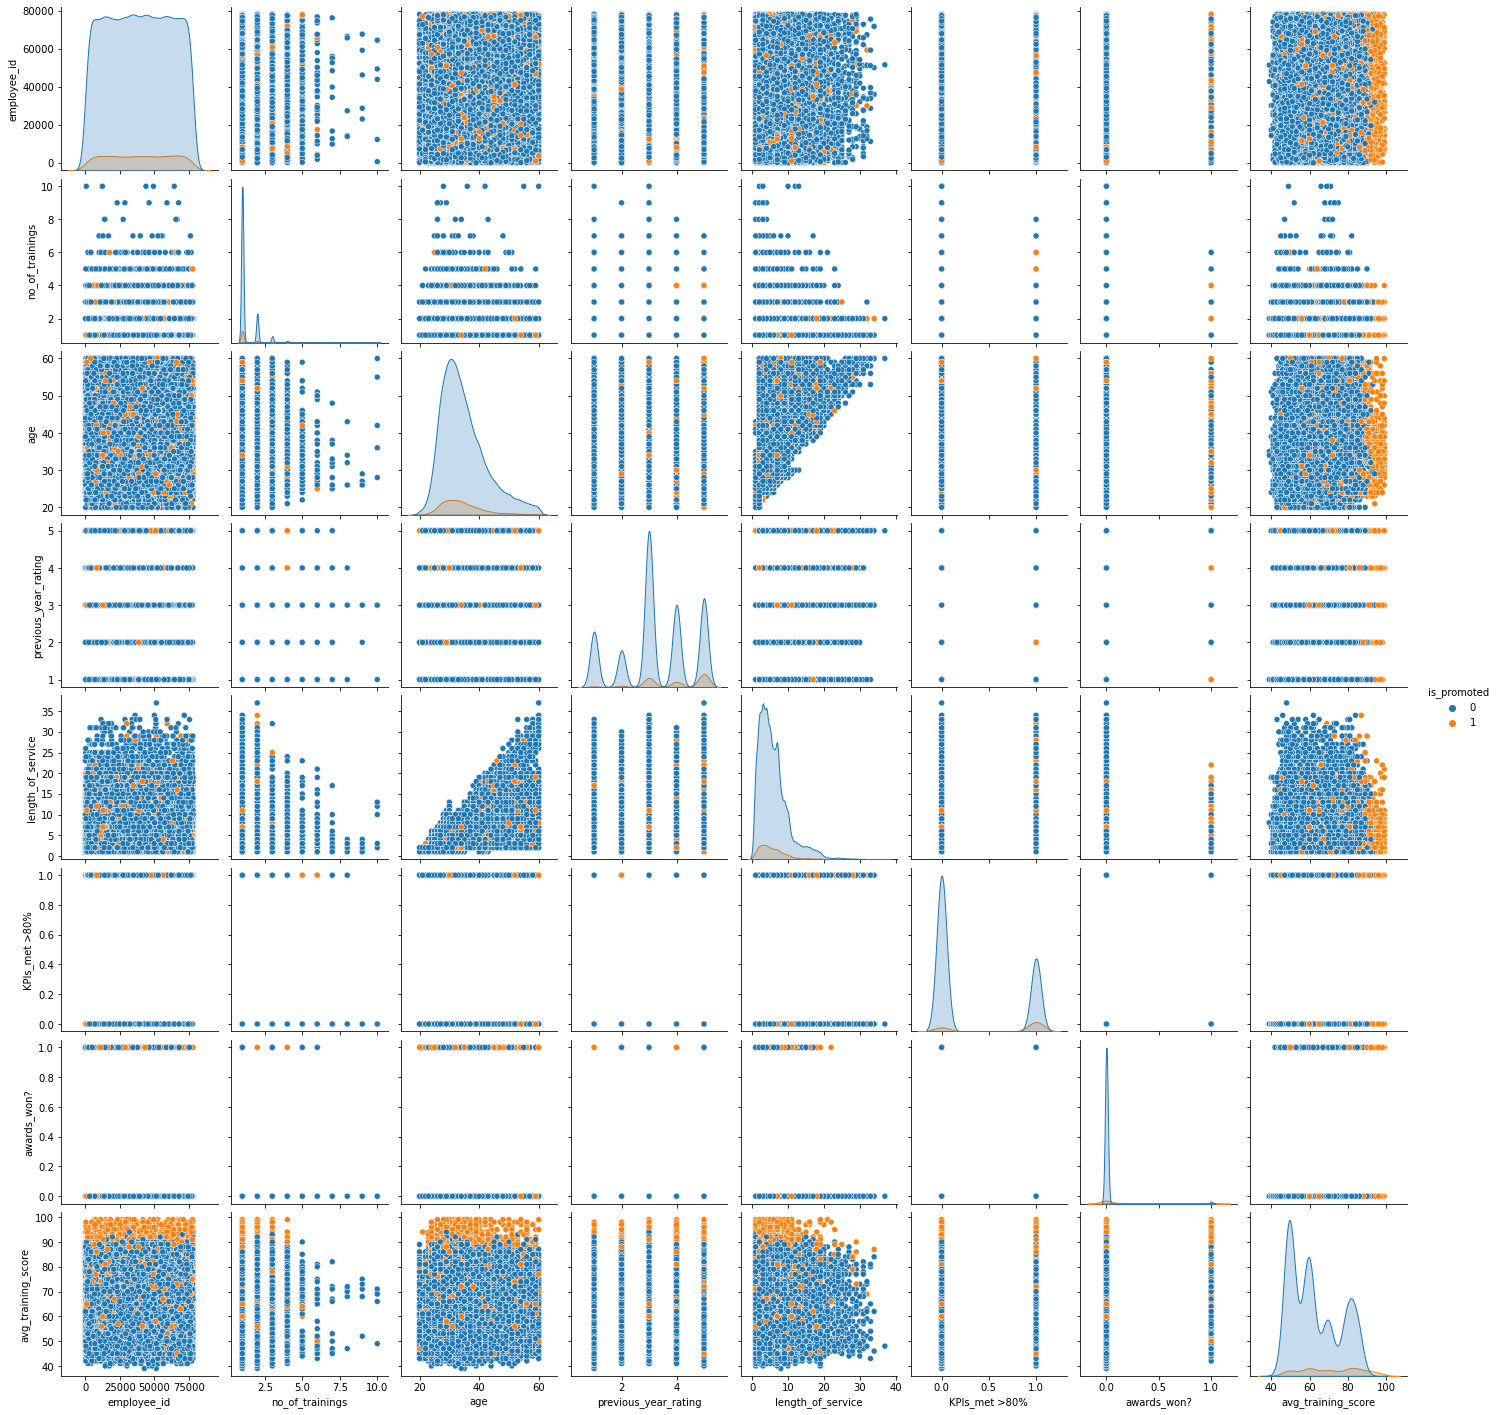

In [ ]:
# Pairplot using sns

sns.pairplot(df,hue='is_promoted')

In [ ]:
# Checking for duplicate values

df[df.duplicated()].count()

department              118
region                  118
education               107
gender                  118
recruitment_channel     118
no_of_trainings         118
age                     118
previous_year_rating     56
length_of_service       118
KPIs_met >80%           118
awards_won?             118
avg_training_score      118
is_promoted             118
dtype: int64

In [4]:
# Finding columns with numerical data

numericalColumns = df.select_dtypes(include=np.number).columns
numericalColumns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [5]:
# Finding columns with objective data

objectColumns = df.select_dtypes(include=object).columns
objectColumns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [6]:
# Finding discrete columns and continuous columns from numerical columns

discreteCols=[]
continuousCols=[]

for column in numericalColumns:
    if df[column].nunique()<=20:
        discreteCols.append(column)
    else:
        continuousCols.append(column)


In [7]:
discreteCols

['no_of_trainings',
 'previous_year_rating',
 'KPIs_met >80%',
 'awards_won?',
 'is_promoted']

In [8]:
continuousCols

['age', 'length_of_service', 'avg_training_score']

In [ ]:
# Plotting the distribution of continuous data with respect to "is_promoted" column

# j=0
# plt.figure(figsize=(20,20))
# plt.title("Continuous columns")
# for column in continuousCols:
#     plt.subplot(2,3,j+1)
#     plt.scatter(df["is_promoted"],df[column])
#     plt.xlabel(column)
#     plt.ylabel("Promoted")
#     j+=1

# j=0
# plt.figure(figsize=(14,5))
# for column in continuousCols:
#     plt.subplot(1,3,j+1)    
#     obsevationVal=df.groupby('is_promoted')[column].mean()
#     obsevationValDF=pd.DataFrame(obsevationVal)
#     obsevationValDF.reset_index(inplace=True)
#     plt.bar(obsevationValDF['is_promoted'],obsevationValDF[column])
#     plt.title(f"The {column} effect on Promotion")
#     plt.xlabel("Promoted")
#     plt.ylabel(column)
#     j+=1

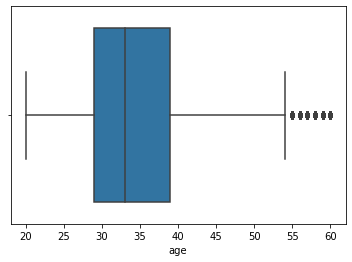

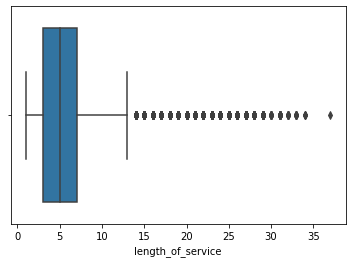

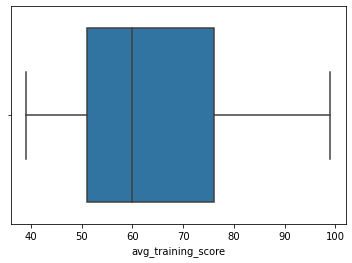

In [21]:
# Checking for Outlier values by plotting

for column in continuousCols:
    sns.boxplot(column,data=df)
    plt.show()

## Dropping Duplicate Rows

In [9]:
df.drop_duplicates(inplace=True)

## Missing Value Treatment

In [10]:
df['education'].fillna(df['education'].mode()[0],inplace=True)
df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0],inplace=True)

## Outlier Treatment

In [11]:
for column in continuousCols:
    upper_lim=df[column].mean() + df[column].std() *3
    lower_lim=df[column].mean() - df[column].std() *3

    df.loc[(df[column] > upper_lim),column] = upper_lim
    df.loc[(df[column] < lower_lim),column] = lower_lim


## Categorical Encoding

In [12]:
# Using Label Encoding

label_Department = LabelEncoder()
label_Region = LabelEncoder()

df["department"]=label_Department.fit_transform(df["department"])
df["region"]=label_Region.fit_transform(df["region"])

In [13]:
# Using Mapping Technique

Education = {"Master's & above":1,"Bachelor's":2,"Below Secondary":3}
Recruitment = {"sourcing":1,"referred":2,"other":3}
Gender = {"f":0,"m":1}

df['education']=df['education'].map(Education)
df['recruitment_channel']=df['recruitment_channel'].map(Recruitment)
df['gender']=df['gender'].map(Gender)

## Train Test Split 

In [35]:
X = df.drop('is_promoted',axis=1)
y = df['is_promoted']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Scale Down

In [36]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test) 

## Apply All Classification Algorithms

In [49]:
# Voting Classifier

lr_clf = LogisticRegression()
df_clf= DecisionTreeClassifier()
rf_clf= RandomForestClassifier()
adboost_clf= AdaBoostClassifier()
grad_clf=GradientBoostingClassifier()
svc_clf=SVC()

voting = VotingClassifier( estimators=[('Logistic_Regression',lr_clf),('Decision_Tree_Classifier',df_clf),('Random_Forest_Classifier',rf_clf),
                            ('AdaBoost_Classifier',adboost_clf),('Gradient_Boosting_Classifier',grad_clf),('SVC',svc_clf)], voting= 'hard')